In [1]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
library_path = '/Users/salvatoreesposito/Desktop/peakonly'
sys.path.append(library_path)
from models.rcnn import RecurrentCNN
from models.cnn_classifier import Classifier
from models.cnn_segmentator import Segmentator
from processing_utils.roi import ROI

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [3]:
model = RecurrentCNN().to(device)
path2weights = os.path.join(library_path,'data', 'weights', 'RecurrentCNN.pt')
model.load_state_dict(torch.load(path2weights, map_location=device))
model.eval()

RecurrentCNN(
  (encoding): EncodingCNN(
    (encoding): Sequential(
      (0): Conv1d(2, 16, kernel_size=(5,), stride=(1,), padding=(2,))
      (1): ReLU()
      (2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
      (3): ReLU()
      (4): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): ReLU()
    )
  )
  (biLSTM): LSTM(64, 64, batch_first=True, bidirectional=True)
  (LSTM): LSTM(128, 128, batch_first=True)
  (classifier): Linear(in_features=128, out_features=2, bias=True)
  (integrator): Linear(in_features=128, out_features=2, bias=True)
)

In [4]:
mzml_filepath = "/Users/salvatoreesposito/Downloads/peakonly-master/data/annotation/Dataset"

In [5]:
import json
import time
from Main import peakonly
from os import listdir
from os.path import isfile, join, isdir
start = time.time()
directories = [f for f in listdir(mzml_filepath) if isdir(join(mzml_filepath, f))]
for dir in directories:
    print(dir)
    dir = mzml_filepath + "/" + dir
    onlyfiles = [f for f in listdir(dir) if isfile(join(dir, f))]
    rois = []
    for files in onlyfiles:
        with open(dir + "/" + files) as json_file:
            try:
                data = json.load(json_file)
            except: 
                print(files)
                continue
            print(data["number of peaks"])
            num_peaks = data["number of peaks"]
        if num_peaks == 1:
            rois += peakonly(onlyfiles)

end = time.time()
print(end - start)



OriginalData_001
1
1
0
0
0
1
1
1
1
0
1
1
0
0
0
0
1
1
4
1
0
1
0
0
1
0
1
0
1
1
1
0
1
0
1
0
2
1
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
1
0
0
1
1
0
0
1
1
1
1
.DS_Store
1
1
0
1
0
1
1
1
0
0
1
0
0
0
1
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
0
2
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
2
0
0
0
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
2
1
1
1
2
1
0
0
0
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
0
0
1
0
0
3
0
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
2
0
1
0
1
1
0
1
1
0
0
0
1
2
1
1
0
0
0
1
1
0
1
2
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
1
0
1
0
1
2
1
1
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
3
1
0
1
1
3
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
0
1
1
1
0
1
1
1
1
2
1
1
0
1
0
0
0
0
0
1
1
0
2
0
1
1
0
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
2
0
0
0
1
0
0
1
1
0
1
1
1
0
1
1
1
0
1
0
1
2
1
0
1
1
1
1
1
1
0
0
1
0
1
1
0
0
1
1
1
2
1
1
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
0
1
1
1
2
2
1
1
1
0
0
1
1
2
2
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
1
0
204.49762

[2, 87, 4, 4, 12, 2, 87, 4, 4, 12]


IndexError: list index out of range

mz = 126.0662, rt = 530.72 - 599.04


In [8]:
from processing_utils.run_utils import preprocess, correct_classification, get_borders, Feature
from Main import sub_rois
import time
from roi import ROI as poROI
import csv
start = time.time()
split_rois=[]
for idx, roi in enumerate(rois):
    if roi.peak_list[-1].scan - roi.peak_list[0].scan >= 5:
        with open("Results_rnn/RNN_roi_" + str (idx) + ".csv", 'w') as file:
            percentage = 10
            split_rois = sub_rois(roi,percentage)
            file.write("percentage,result,mz,rt,scan,max_intensity" + "\n")
            for i in range(len(split_rois)-1):
                rr = poROI([split_rois[i].peak_list[0].scan,split_rois[i].peak_list[-1].scan],
                        [split_rois[i].peak_list[0].rt,split_rois[i].peak_list[-1].rt],
                        [p.i for p in split_rois[i].peak_list],
                        [split_rois[i].peak_list[0].mz,split_rois[i].peak_list[-1].mz],split_rois[i].mean_mz)
                signal = preprocess(rr.i, torch.device('cpu'))
                classifier_output, segmentator_output = model(signal)
                classifier_output = classifier_output.data.cpu().numpy()
                segmentator_output = segmentator_output.data.sigmoid().cpu().numpy()
                borders = get_borders(segmentator_output[0, 0, :], segmentator_output[0, 1, :],
                peak_minimum_points=8)
                label = np.argmax(classifier_output)
                # print(label)
                result = classifier_output [0] [1]
                result = 1/(1+np.exp(-result))
                if result > 0.5:
                    result = 1
                else: 
                    result = 0
                features = []
                for border in borders:
                    # to do: check correctness of rt calculations
                    scan_frequency = (rr.scan[1] - rr.scan[0]) / (rr.rt[1] - rr.rt[0])
                    rtmin = rr.rt[0] + border[0] / scan_frequency
                    rtmax = rr.rt[0] + border[1] / scan_frequency
                    feature = Feature(["AAA"], [roi], [border], [0], [np.sum(rr.i[border[0]:border[1]])],
                                    rr.mzmean, rtmin, rtmax, 0, 0)
                    features.append(feature)
                    
                    label = np.argmax(classifier_output)
                    result = label
                    # result = classifier_output [0] [1]
                    # result = 1/(1+np.exp(-result))
                    print(result)
                file.write(str(i*percentage + percentage) + " ," + str(result)+ " ," + str(np.array(rr.mz))+ " ," + str(np.array(rr.rt))                    + " ," + str(np.array(rr.scan)) + " ," + str(np.max(rr.i)) + "\n")


        # print(split_rois)
                print(percentage*i + percentage, result)
end = time.time()
print(end - start)
    

50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
70 1
80 0
1
90 1
1
100 1
10 0
20 0
30 0
40 1
50 0
60 0
70 0
80 0
90 0
100 0
10 0
20 0
1
30 1
1
40 1
1
50 1
1
60 1
1
7

In [21]:
from os import listdir
import statistics
from os.path import isfile, join, isdir
import numpy as np
import csv
import pandas as pd
onlyfiles = [f for f in listdir("Results_rnn") if isfile(join("Results_rnn", f))]
rois = []
percentages = []
intensities = []
mz = []
rt = []
rnn_percentage = []
num_rois = 0
num_classified_rois = 0
# results_file = open("Final_Results_rnn.csv","w")
# results_file.write("percentage,result,mz,rt,scan,max_intensity" + "\n")
for files in onlyfiles:
    findpercentage = False
    file_name = files
    with open("Results_rnn/"+files, 'r') as file:
        next(file)
        for line in file:
            print(file_name)
            line = line.split(",")
            if line[1].strip()== str (1):
                percentage = line[0].strip()
                result = line[1].strip()
                if (int(result)) == 1 and not findpercentage:
                    rnn_percentage.append(int(percentage))
                    findpercentage = True
                intensity = line[5].strip()
                percentages.append(line[0])
                mzstart, mzend=(line[2].split())
                mzstart = mzstart.replace("[","")
                mzend= mzend.replace("]","")
                mzvalue = statistics.mean([float(mzstart), float(mzend)])
                mz.append(mzvalue)
                rt_start = line[3].split()[0]
                rt_end = line[3].split()[1]
                rt_start = rtstart.replace("[","")
                rt_end= rtend.replace("]","")
                rtvalue = statistics.mean([float(rt_start), float(rt_end)])
                rt.append(rtvalue)
                num_classified_rois += 1
                intensity = float(intensity.replace("\n",""))
                intensities.append(intensity)
            num_rois += 1
            print(line)
        # "," + str(result)+ "," + str(np.array(list(line[2]))+ "," + np.array(list(line[3])) + "," + str(np.array(list(line[4])) + "," + str(np.max(line[5])) + "\n")
mean_mz = statistics.mean(mz)
mean_rt = statistics.mean(rt)
intensity = statistics.mean(intensities)
percent = statistics.mean(rnn_percentage)
print(mean_mz)
print(intensity)
print(percent)
print(pd.Series(rnn_percentage).value_counts())
print(num_classified_rois/num_rois)
with open('Final_mean_rnn_results.csv', 'w', newline='') as csvfile: 
    meanwriter = csv.writer(csvfile, delimiter=' ',quotechar='|',quoting=csv.QUOTE_MINIMAL)
# meanwriter = csv.writer("Final_mean_results" csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)) 
    meanwriter.writerow(["cnn_value_count","classified_rois","mean_mz","mean_rt","mean_max_intensity"])
    meanwriter.writerow([pd.Series(rnn_percentage).value_counts(),str(num_classified_rois/num_rois),mean_mz,mean_rt, intensity])

bar_data = pd.Series(rnn_percentage).value_counts()
print(bar_data)


roi_1309.csv
['60 ', '0 ', '[116.10703278 116.10697174] ', '[444.924 452.543] ', '[342 348] ', '113985.0\n']
RNN_roi_1309.csv
['70 ', '0 ', '[116.10703278 116.10699463] ', '[444.924 453.785] ', '[342 349] ', '127818.28\n']
RNN_roi_1309.csv
['80 ', '0 ', '[116.10703278 116.10695648] ', '[444.924 455.025] ', '[342 350] ', '135867.73\n']
RNN_roi_1309.csv
['90 ', '0 ', '[116.10703278 116.106987  ] ', '[444.924 456.268] ', '[342 351] ', '135867.73\n']
RNN_roi_1309.csv
['100 ', '0 ', '[116.10703278 116.10684204] ', '[444.924 457.545] ', '[342 352] ', '135867.73\n']
RNN_roi_676.csv
['10 ', '0 ', '[116.07068634 116.07055664] ', '[441.211 451.194] ', '[339 347] ', '4609090.0\n']
RNN_roi_676.csv
['20 ', '0 ', '[116.07068634 116.07069397] ', '[441.211 462.781] ', '[339 356] ', '11080845.0\n']
RNN_roi_676.csv
['30 ', '1 ', '[116.07068634 116.07064056] ', '[441.211 472.896] ', '[339 364] ', '14503865.0\n']
RNN_roi_676.csv
['40 ', '1 ', '[116.07068634 116.07061005] ', '[441.211 484.11 ] ', '[339 373

Int64Index([40, 30], dtype='int64')
40    264
30    264
dtype: int64
0
10
20
50
60
70
80
90
100
40     264
30     264
0        0
10       0
20       0
50       0
60       0
70       0
80       0
90       0
100      0
dtype: int64


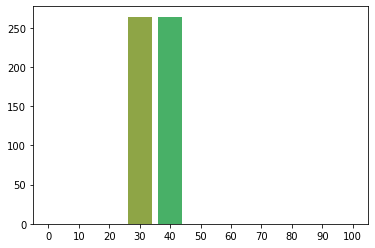

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
print(bar_data.index)
print(bar_data)
for i in range(0,101,10):
    if i not in bar_data.index:
        print(i)
        bar_data.at[i]=0
print(bar_data)
sns.barplot(x=bar_data.index, y= bar_data.values)